# 1.Problem Statement

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 2. Data Gathering

In [4]:
df = pd.read_csv('loan.csv')
df.shape

(163987, 15)

### 2.1 Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [6]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [11]:
cat_features = df.select_dtypes(include = 'object').columns
print("Cat features are :",cat_features),len(cat_features)

Cat features are : Index(['term', 'home_ownership', 'purpose', 'addr_state',
       'verification_status'],
      dtype='object')


(None, 5)

In [12]:
num_features = df.select_dtypes(exclude = 'object').columns
print("Cat features are :",num_features),len(num_features)

Cat features are : Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan',
       'longest_credit_length'],
      dtype='object')


(None, 10)

# 3. Exploratory Data Analysis

### 3.1 Count of Bad Loan

In [13]:
df['bad_loan'].value_counts()

0    133971
1     30016
Name: bad_loan, dtype: int64

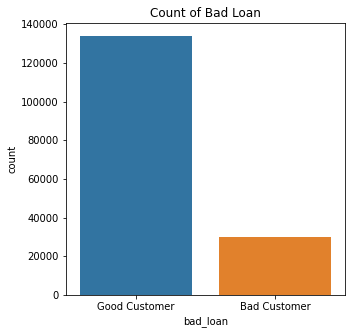

In [18]:
plt.figure(figsize=(5,5))
plt.title('Count of Bad Loan')
sns.countplot(x=df['bad_loan'])
plt.xticks(ticks=np.arange(2),labels = ['Good Customer','Bad Customer'])
plt.show()


<AxesSubplot:ylabel='bad_loan'>

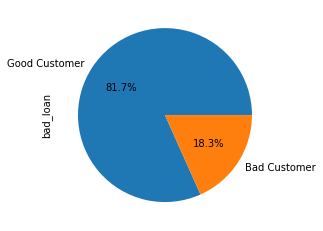

In [23]:
labels = ['Good Customer','Bad Customer']
df['bad_loan'].value_counts().plot(kind ='pie',labels = labels,autopct='%1.1f%%')

## 3.2 Distribution of Loan Amount

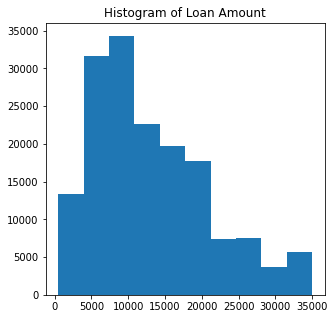

In [27]:
plt.figure(figsize=(5,5))
plt.title('Histogram of Loan Amount')
plt.hist(x=df['loan_amnt'])
plt.show()

In [30]:
# sns.distplot(df['loan_amnt'])

## 3.3 Count plot of Term

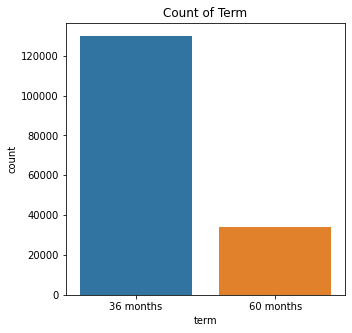

In [32]:
plt.figure(figsize=(5,5))
plt.title('Count of Term')
sns.countplot(x=df['term'])
labels = df['term'].unique()

plt.xticks(ticks=np.arange(2),labels=labels)
plt.show()


<AxesSubplot:ylabel='term'>

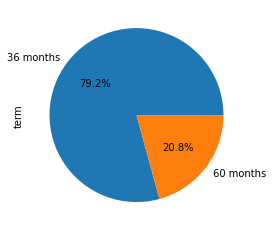

In [34]:
df['term'].value_counts().plot(kind ='pie',labels = labels,autopct='%1.1f%%')

## 3.5 int_rate


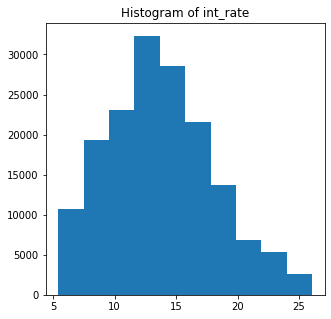

In [36]:
plt.figure(figsize=(5,5))
plt.title('Histogram of int_rate')
plt.hist(x=df['int_rate'])
plt.show()

# 3.6 emp_length

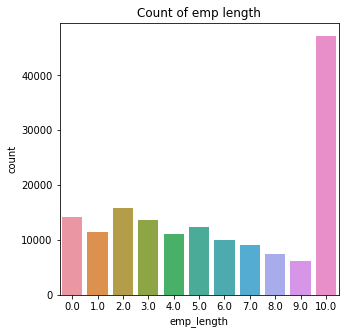

In [41]:
plt.figure(figsize=(5,5))
plt.title('Count of emp length')
sns.countplot(x=df['emp_length'])
labels = df['emp_length'].unique()

plt.xticks(ticks=np.arange(11))
plt.show()

## 3.7 home_ownership


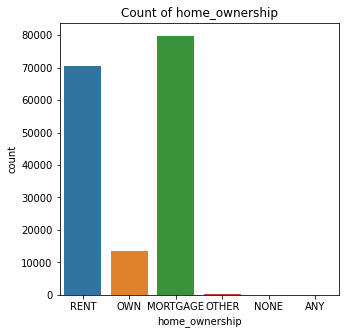

In [45]:
plt.figure(figsize=(5,5))
plt.title('Count of home_ownership')
sns.countplot(x=df['home_ownership'])
labels = df['home_ownership'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

# 3.8 annual_inc

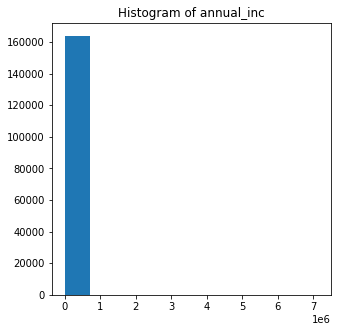

In [48]:
plt.figure(figsize=(5,5))
plt.title('Histogram of annual_inc')
plt.hist(x=df['annual_inc'])
plt.show()

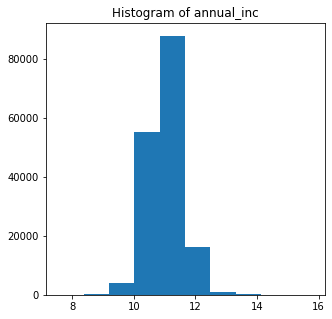

In [50]:
plt.figure(figsize=(5,5))
plt.title('Histogram of annual_inc')
plt.hist(x=np.log(df['annual_inc'])) # Log Transform
plt.show()

c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

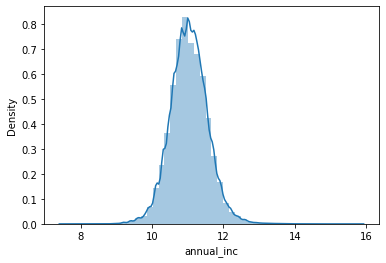

In [52]:
sns.distplot(np.log(df['annual_inc']))

## 3.9 purpose

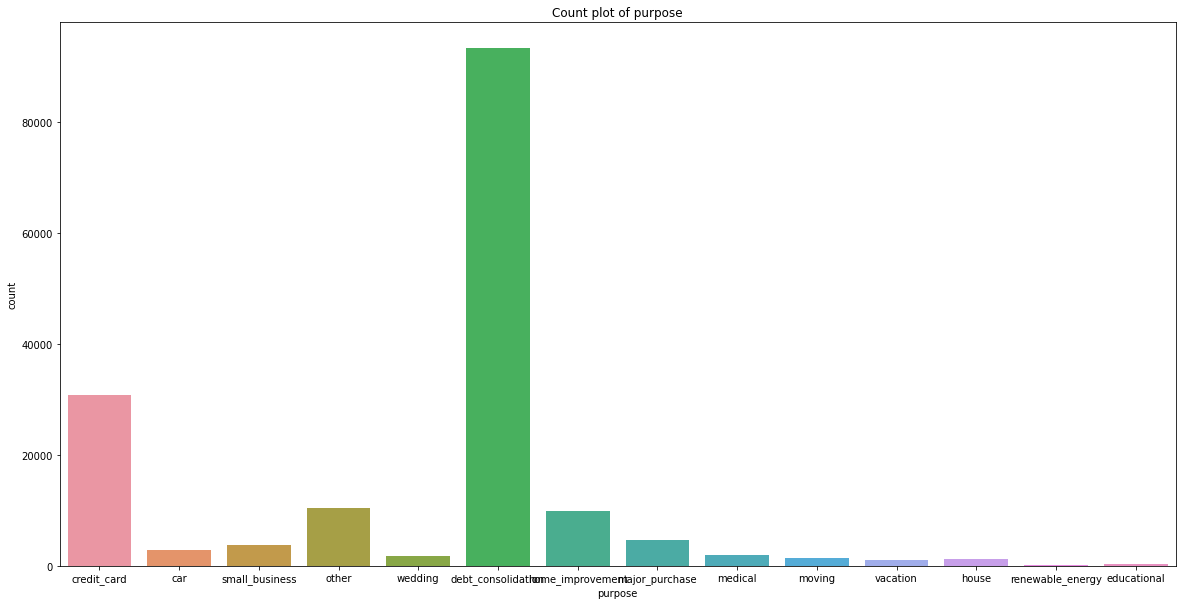

In [57]:
plt.figure(figsize=(20,10))
plt.title('Count plot of purpose')
sns.countplot(x=df['purpose'])
labels = df['purpose'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

# 3.10 addr_state

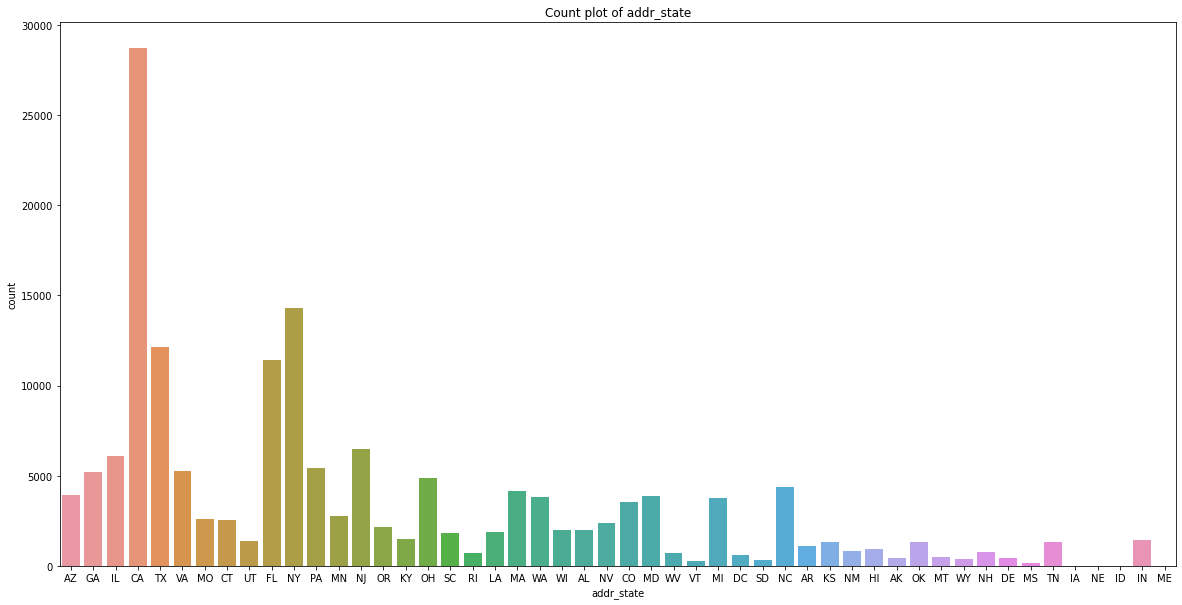

In [59]:
plt.figure(figsize=(20,10))
plt.title('Count plot of addr_state')
sns.countplot(x=df['addr_state'])
labels = df['addr_state'].unique()

plt.xticks(ticks=np.arange(len(labels)))
plt.show()

## 3.11 DTI(Debt to income Ratio)

Debt(Rent,Credit Card,mortage)
salary
Lower DTI, Less risky 

5000
40000

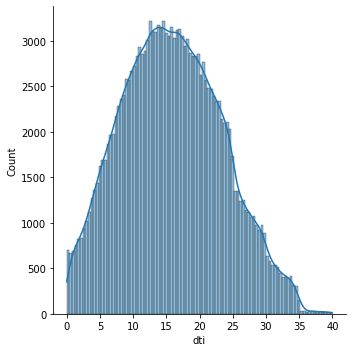

In [61]:
sns.displot(df['dti'],kde=True)

## 3.12 longest_credit_length

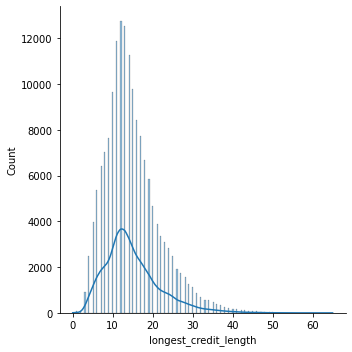

In [63]:
sns.displot(df['longest_credit_length'],kde=True)

# 4. Feature Engineering

## 4.1 Correlation of Features

<AxesSubplot:>

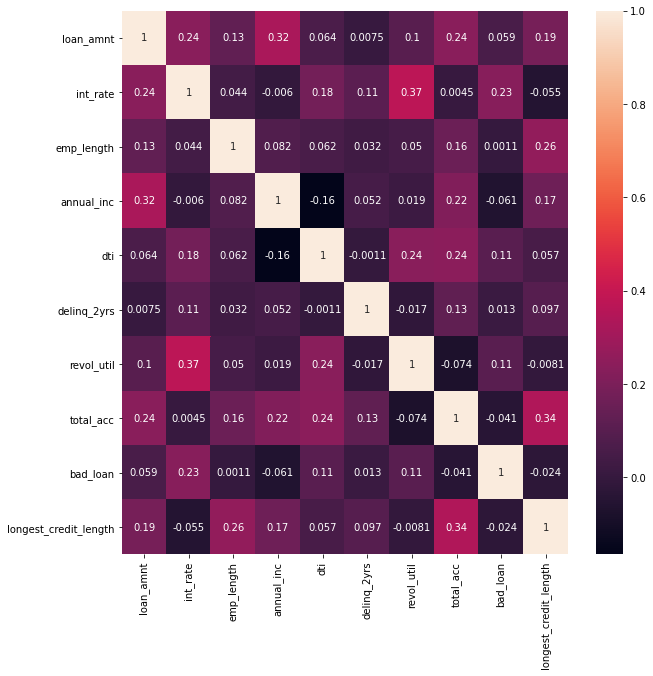

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:ylabel='annual_inc'>

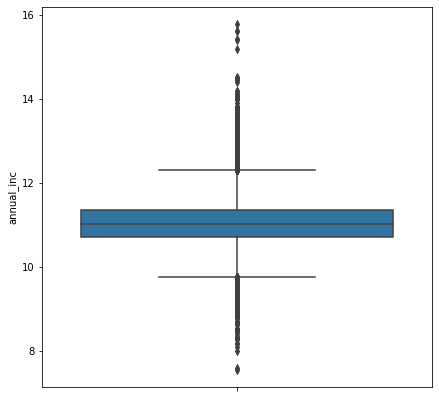

In [71]:
plt.figure(figsize=(7,7))
sns.boxplot(y=np.log(df['annual_inc']))

In [74]:
np.log(df['annual_inc'])

0         10.085809
1         10.308953
2          9.413444
3         10.803649
4         10.491274
            ...    
163982    10.714418
163983    11.289782
163984    10.545341
163985    11.002100
163986    11.052127
Name: annual_inc, Length: 163987, dtype: float64

<AxesSubplot:ylabel='my_values'>

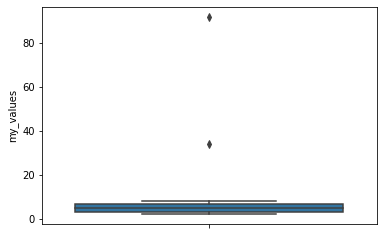

In [80]:
df1 = pd.DataFrame()
df1['my_values'] = [2,3,4,5,6,7,8,92,3,5,6,3,4,34]
sns.boxplot(y=df1['my_values'])

In [82]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

# 4.3 Fill Null Values

In [84]:
df['total_acc'].fillna(df['total_acc'].mean(),inplace = True)

In [85]:
df['annual_inc'].fillna(df['annual_inc'].median(),inplace = True)

In [88]:
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(),inplace = True)

In [91]:
df['longest_credit_length'].fillna(df['longest_credit_length'].median(),inplace = True)

In [92]:
df['revol_util'].fillna(df['revol_util'].median(),inplace = True)

In [94]:
df['emp_length'].fillna(df['emp_length'].median(),inplace = True)

In [97]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
purpose                  0
addr_state               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
verification_status      0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             163987 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163987 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163987 non-null  float64
 10  revol_util             163987 non-null  float64
 11  total_acc              163987 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163987 non-null  float64
 14  verification_status    163987 non-nu

In [101]:
cat_features = df.select_dtypes(include = 'object').columns
print("Cat features are :",cat_features),len(cat_features)

Cat features are : Index(['term', 'home_ownership', 'purpose', 'addr_state',
       'verification_status'],
      dtype='object')


(None, 5)

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [108]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,0,10.65,10.0,5,24000.0,1,3,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,1,15.27,0.0,5,30000.0,0,10,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,0,15.96,10.0,5,12252.0,11,14,8.72,0.0,98.5,10.0,0,10.0,0
3,10000,0,13.49,10.0,5,49200.0,9,4,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,0,7.90,3.0,5,36000.0,13,3,11.20,0.0,28.3,12.0,0,7.0,1


In [113]:
df['purpose'].unique()

array([ 1,  0, 11,  9, 13,  2,  4,  6,  7,  8, 12,  5, 10,  3])

## 4.3 Log Transform

In [115]:
df['annual_inc'] = np.log(df['annual_inc'])

# 5. Model Building

In [117]:
x = df.drop('bad_loan',axis = 1)
y = df['bad_loan']

In [119]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## 5.1 Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy of model ',accuracy_score(y_test,y_pred))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report\n ',classification_report(y_test,y_pred))

Accuracy of model  0.8180986645527166
Confusion Matrix 
 [[26669   183]
 [ 5783   163]]
classification_report
                precision    recall  f1-score   support

           0       0.82      0.99      0.90     26852
           1       0.47      0.03      0.05      5946

    accuracy                           0.82     32798
   macro avg       0.65      0.51      0.48     32798
weighted avg       0.76      0.82      0.75     32798



c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
from sklearn.model_selection import cross_val_score


In [127]:
cv_score = cross_val_score(model,x,y,cv=5)

c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
print(cv_score)

[0.81694006 0.81748887 0.81617221 0.8158673  0.81431228]


### Feature Selection Using Correlation coeff

In [132]:
corr_matrix = df.corr()

In [134]:
corr_matrix

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
loan_amnt,1.000000,0.404383,0.237194,0.127678,-0.186356,0.481695,-0.144061,0.005639,0.064353,0.007572,0.101865,0.239046,0.058686,0.186591,0.351040
term,0.404383,1.000000,0.448515,0.082689,-0.109168,0.127252,-0.028809,0.014559,0.074072,0.008293,0.061527,0.102759,0.148025,0.065003,0.290105
int_rate,0.237194,0.448515,1.000000,0.042887,0.059597,0.000718,0.044839,0.007305,0.178344,0.109587,0.372930,0.004484,0.231142,-0.055171,0.223421
emp_length,0.127678,0.082689,0.042887,1.000000,-0.220058,0.152486,-0.051937,0.007126,0.061191,0.031377,0.048134,0.154365,0.001735,0.249810,0.067032
home_ownership,-0.186356,-0.109168,0.059597,-0.220058,1.000000,-0.287953,0.036119,-0.058376,-0.002887,-0.044714,0.013912,-0.259461,0.048381,-0.211424,-0.081691
annual_inc,0.481695,0.127252,0.000718,0.152486,-0.287953,1.000000,-0.014090,-0.005449,-0.173965,0.077562,0.051690,0.352606,-0.092442,0.254565,0.160930
purpose,-0.144061,-0.028809,0.044839,-0.051937,0.036119,-0.014090,1.000000,-0.003759,-0.138170,0.006787,-0.154038,-0.089604,0.034624,-0.057089,-0.023002
addr_state,0.005639,0.014559,0.007305,0.007126,-0.058376,-0.005449,-0.003759,1.000000,0.036025,0.002331,-0.003139,0.045635,-0.003775,0.010825,-0.008240
dti,0.064353,0.074072,0.178344,0.061191,-0.002887,-0.173965,-0.138170,0.036025,1.000000,-0.001081,0.239692,0.242035,0.105533,0.056798,0.106667
delinq_2yrs,0.007572,0.008293,0.109587,0.031377,-0.044714,0.077562,0.006787,0.002331,-0.001081,1.000000,-0.016896,0.125676,0.013083,0.097149,0.022007


# KNN 

In [ ]:
Without Scaling

# Standard Scaler
# MinMax Scaler

With Scaling

With Hyper Parameter Tuning 

# Randomized Search CV
# 1,10

# Decision Tree Algorithm

In [ ]:
With Hyper Parameter Tuning 

# Randomized Search CV
# 1,10

# Random Forest Algorithm

# AdaBoost

# XGBoost

# Improve model Accuracy

In [137]:
# SMOTE(Stnthetic Minority Oversampling Technqiue)

In [ ]:
Log
DT
Recall 

In [138]:
from imblearn.over_sampling import SMOTE

In [152]:
sm = SMOTE(random_state=1)
x_sm,y_sm = sm.fit_resample(x,y.ravel())

In [149]:
len(y_sm)

200956

In [150]:
sum(y_sm == 1)

66985

In [151]:
sum(y_sm == 0)

133971